<a href="https://colab.research.google.com/github/FaizAlam/ML/blob/main/Olmypics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **we are going to analyze Olympics dataset**

-Dataset is from kaggle, which has 271,116 rows and 15 columns. It has 120 years of data

-Each row corresponds to individual athelete in individual event

### Download dataset using kaggle api

In [1]:
pip install opendatasets --upgrade --quiet

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: faizalam53
Your Kaggle Key: ··········


100%|██████████| 5.43M/5.43M [00:00<00:00, 81.3MB/s]

### Import dataset and having a basic look at it

In [7]:
filename = '/content/120-years-of-olympic-history-athletes-and-results/athlete_events.csv'
region = '/content/120-years-of-olympic-history-athletes-and-results/noc_regions.csv'

In [12]:
athletes = pd.read_csv(filename)
noc = pd.read_csv(region)
athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


- Each athelete is attributed by unique ID
- Then their name
- Sex(Gender)
- Height in cm
- Weight in kg
- Team name
- NOC is 3 letter code of different country's olympic committee.
- Games is year of games and Summer or Winter
- Then there's Year and season seperately 
- Host city name
- Sports name
- Complete Event name
- Medals won

In [13]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [14]:
#Join the dataframes
df = athletes.merge(noc,how='left',on='NOC')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


### Analysis

In [16]:
df.shape

(271116, 17)

In [18]:
#make column names consistent
df.rename(columns={'region':'Region','notes':'Notes'},inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [21]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [22]:
#check NAN values
nan_values = df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [23]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [24]:
# Q). print the column names containing null value or missing value in the form of list
missing_lst = df.columns[df.isnull().any()].tolist()
missing_lst

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [ ]:
#india details

In [26]:
df[df['Team']=='India']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [ ]:
#Japan Details

In [27]:
df[df['Team']=='Japan']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266953,133565,Tsuneya Yuzaki,M,19.0,174.0,67.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266954,133565,Tsuneya Yuzaki,M,23.0,174.0,67.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266955,133565,Tsuneya Yuzaki,M,27.0,174.0,67.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266957,133566,Ryo Yuzawa,M,27.0,175.0,76.0,Japan,JPN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,Japan,NaN


In [ ]:
#top participating countries 

In [36]:
top_country = df.Team.value_counts(ascending=False).head(10)
top_country

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

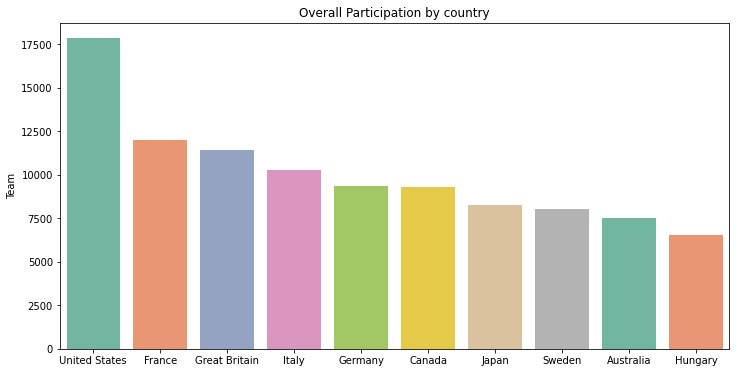

In [38]:
#plot for top 10 teams who have participated in Olympics
plt.figure(figsize=(12,6))
plt.title('Overall Participation by country')
sns.barplot(x=top_country.index,y=top_country,palette='Set2')


(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

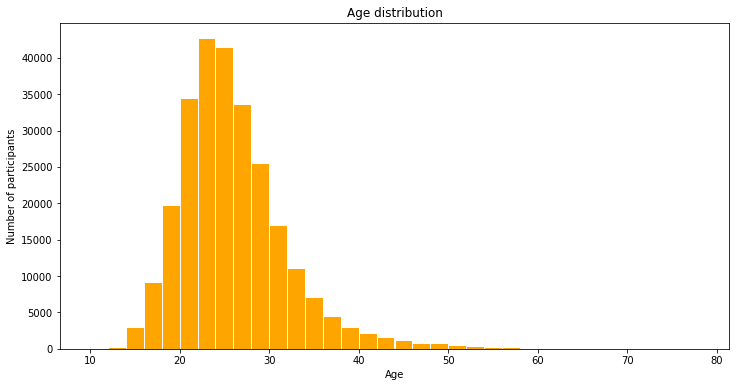

In [40]:
 #age distribution of athlete

 plt.figure(figsize=(12,6))
 plt.title('Age distribution')
 plt.xlabel('Age')
 plt.ylabel('Number of participants')
 plt.hist(df.Age,bins =np.arange(10,80,2),color='orange',edgecolor='white')

Most athletes have age between 20-30 years

In [41]:
#winter olympics sports
winter_sports = df[df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [42]:
#summer olympics sports
summer_sports = df[df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [43]:
#male and female Participants
gender_counts = df.Sex.value_counts()
gender_counts


M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7f79b3768590>,
 [Text(-0.8361576252945937, -0.7147310163003325, 'M'),
  Text(0.836157692212537, 0.7147309380136029, 'F')],
 [Text(-0.45608597743341467, -0.38985328161836313, '72.5%'),
  Text(0.456086013934111, 0.38985323891651064, '27.5%')])

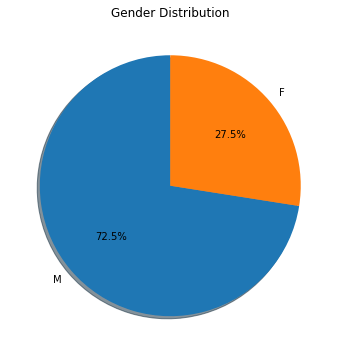

In [47]:
#pie plot for gender
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=90,shadow=True)

In [48]:
#Total medals won
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [51]:
#total female athletes taken part in each olympics

female_participants = df[(df.Sex=='F')& (df.Season=='Summer')][['Sex','Year']] 
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [53]:
women_olympics = df[(df['Sex']=='F')&(df['Season']=='Summer')]

Text(0.5, 1.0, 'Women Participation')

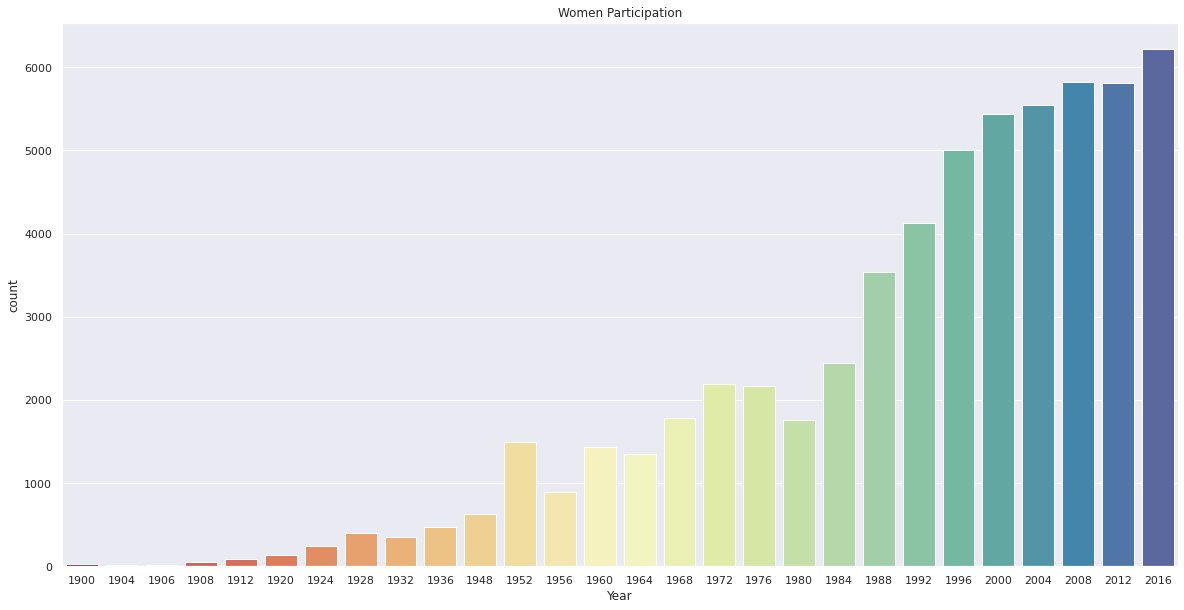

In [54]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=women_olympics,palette='Spectral')
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of female athlete over time')

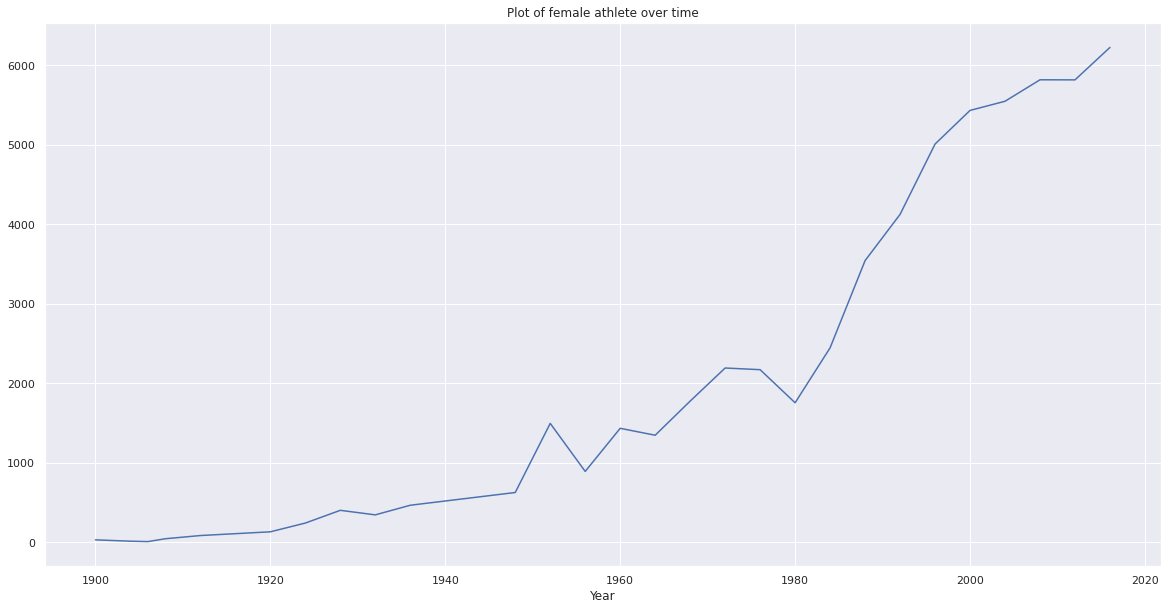

In [57]:
part = women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of female athlete over time')

In [59]:
#gold medal athletes

gold_medals = df[(df['Medal']=='Gold')]
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [60]:
#take only those values that are different from NaN

gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]

In [61]:
#gold beyong 60

gold_medals['ID'][gold_medals['Age']>60].count()

6

In [62]:
sporting_event = gold_medals['Sport'][gold_medals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [63]:
#gold medal for each country

gold_medals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medal for country')

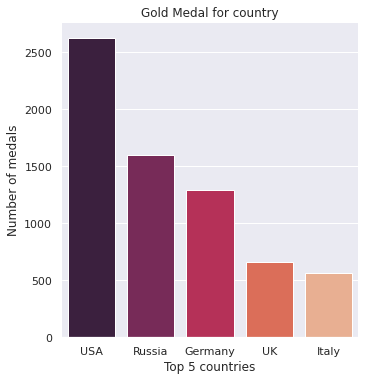

In [66]:
totalGoldMedal = gold_medals.Region.value_counts().reset_index(name='Medal').head(5)

g = sns.catplot(x='index',y='Medal',data=totalGoldMedal,height=5,kind='bar',palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_ylabels('Number of medals')
plt.title('Gold Medal for country')


In [70]:
#Rio olympics

max_year = df.Year.max()
max_year

team_names = df[(df.Year==2016) & (df.Medal=='Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Country-wise medal for the year 2016')

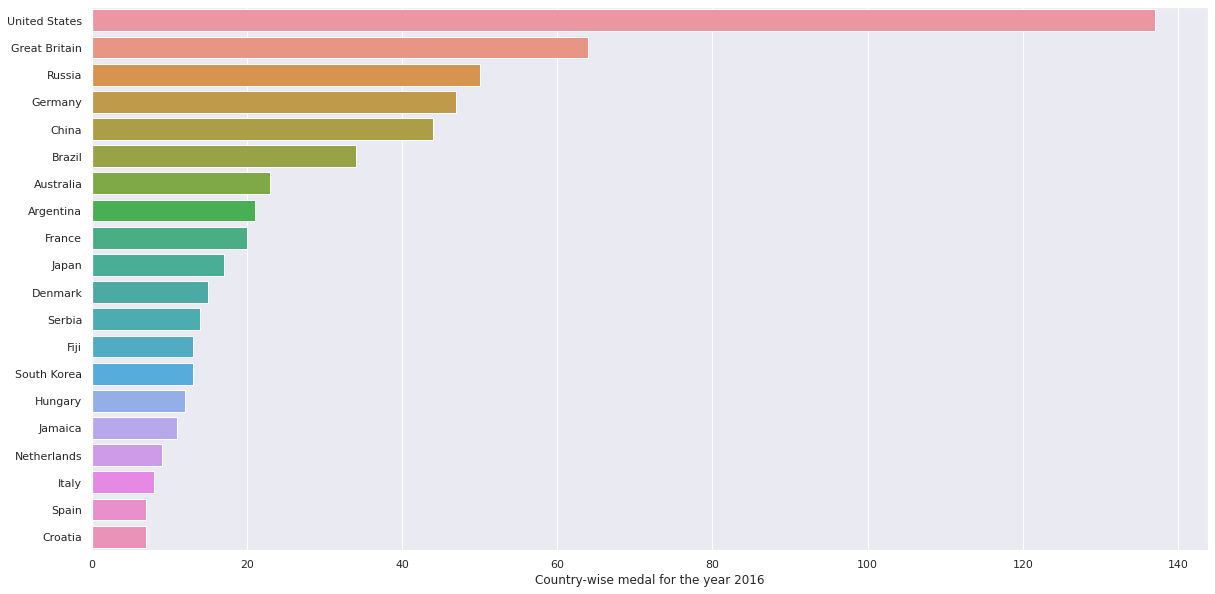

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x=team_names.value_counts().head(20),y= team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Country-wise medal for the year 2016')

In [76]:
not_null_medals = df[(df.Height.notnull()) & (df.Weight.notnull())]

Text(0.5, 1.0, 'Height vs. Weight of olympic medalists')

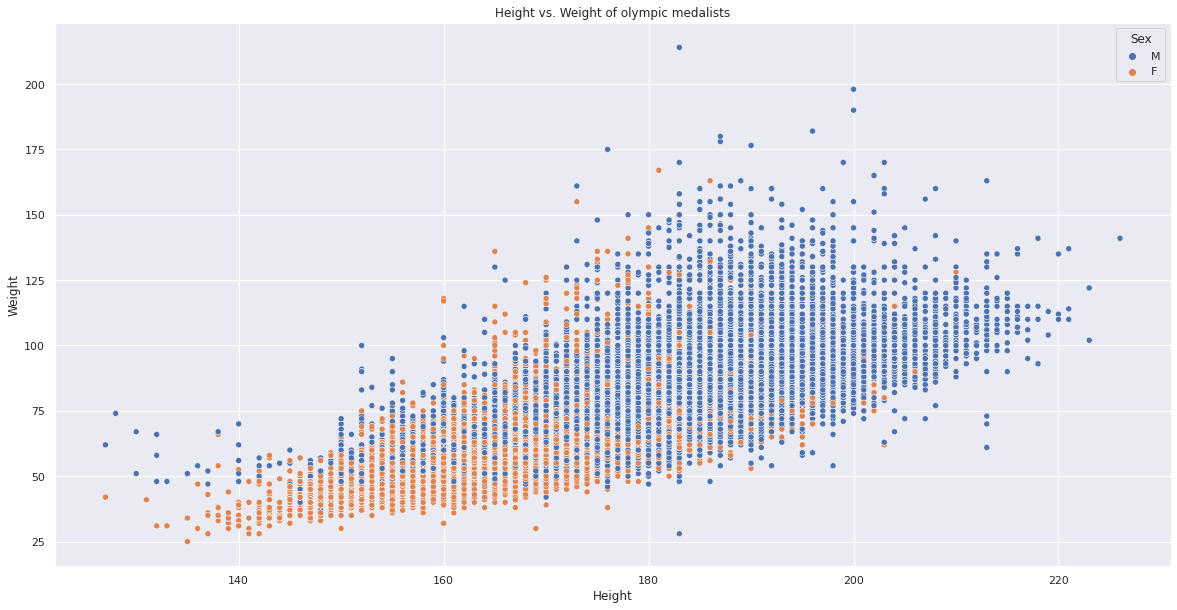

In [78]:
plt.figure(figsize=(20,10))
axis = sns.scatterplot(x='Height',y='Weight',data=not_null_medals,hue='Sex')
plt.title('Height vs. Weight of olympic medalists')